# Beans

## Packages and dataframe

---



In [ ]:
pip install Pingouin

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 KB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 92.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7047 sha256=35f46afc69e2752f9fc80f615da934e2bdc153d1feb2e55a4c82491195d4fa2a
  Stored in directory: /root/.cache/pip/wheels/6a/33/c4/0ef84d7f5568c2823e3d63a6e08988852fb9e4bc822034870a
Successfully built littleutils
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
pip install scikit-posthocs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 51.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.0/300.0 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 KB 29.0 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


In [ ]:
import pingouin as pg
import pandas as pd
import numpy as np
import statistics as st
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import io
import cufflinks as cf
from IPython.display import display,HTML
from scipy.stats import sem
from scipy.stats import pearsonr
import scikit_posthocs as sp
from scipy.stats import shapiro
from scipy.stats import poisson
from scipy.stats import stats
from scipy.ndimage.measurements import label
from statsmodels.stats.multicomp import pairwise_tukeyhsd
cf.set_config_file(sharing='public',theme='ggplot',offline=True)

In [ ]:
matplotlib.__version__

'3.7.0'

In [ ]:
df = pd.read_excel('Beans.xlsx')

## Data overview

In [ ]:
df

,Sample,Micro,Time,Code,Moist,Phytates,Tanins,Protein,Fat,Ash,...,C20:2,C21:0,C22:0,C23:0,C24:0,C18:1n9t,C15:0,C18:3n6,C22:2,C17:1
0,Bean,Fungi,10h,CF,5.84,0.27,0.00,27.270000,1.550000,3.920000,...,0.801,2.037,3.107,0.545,2.684,0.0,0.287,0.850,0.0,0.0
1,Bean,Fungi,10h,CF,5.76,0.29,0.00,25.730000,1.550000,4.280000,...,0.894,2.421,3.011,0.756,3.009,0.0,0.263,0.893,0.0,0.0
2,Bean,Fungi,10h,CF,5.86,0.28,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Bean,Fungi,10h,102F,6.76,0.00,0.21,31.640000,2.330000,5.470000,...,0.000,0.557,1.293,0.000,1.154,0.0,0.389,0.584,0.0,0.0
4,Bean,Fungi,10h,102F,6.13,0.00,0.22,30.810000,2.350000,5.550000,...,0.000,0.686,1.392,0.000,1.077,0.0,0.400,0.561,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Bean_Rice,Bacteria,120h,LBF,6.65,0.74,0.00,19.113500,7.912527,6.222817,...,0.562,0.000,0.473,0.000,0.571,0.0,0.000,0.000,0.0,0.0
92,Bean_Rice,Bacteria,120h,LBF,6.75,0.73,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,Bean_Rice,Bacteria,120h,PPF,6.89,0.74,0.00,17.769606,8.193893,6.040000,...,0.470,0.411,0.602,0.306,1.255,0.0,0.000,0.000,0.0,0.0
94,Bean_Rice,Bacteria,120h,PPF,6.59,0.73,0.00,18.307737,8.247657,6.410000,...,0.438,0.361,0.674,0.347,1.387,0.0,0.000,0.000,0.0,0.0


In [ ]:
df['TotSugars'] = df[['Fructose', 'Glucose', 'Manitol', 'Sacarose', 'Trealose', 'Rafinose', 'Estaquiose']].sum(axis=1)
df.head(2)

,Sample,Micro,Time,Code,Moist,Phytates,Tanins,Protein,Fat,Ash,...,C21:0,C22:0,C23:0,C24:0,C18:1n9t,C15:0,C18:3n6,C22:2,C17:1,TotSugars
0,Bean,Fungi,10h,CF,5.84,0.27,0.0,27.27,1.55,3.92,...,2.037,3.107,0.545,2.684,0.0,0.287,0.850,0.0,0.0,4.09
1,Bean,Fungi,10h,CF,5.76,0.29,0.0,25.73,1.55,4.28,...,2.421,3.011,0.756,3.009,0.0,0.263,0.893,0.0,0.0,4.28


In [ ]:
df.describe()

,Moist,Phytates,Tanins,Protein,Fat,Ash,Carbs,Kcal,Fructose,Glucose,...,C21:0,C22:0,C23:0,C24:0,C18:1n9t,C15:0,C18:3n6,C22:2,C17:1,TotSugars
count,96.000000,96.000000,96.000000,64.000000,64.000000,64.000000,64.000000,64.000000,96.000000,96.000000,...,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,64.000000,96.000000
mean,6.161771,0.419375,0.041875,22.919101,3.879027,5.313890,67.887513,398.139415,0.637628,0.545898,...,0.935531,1.352391,0.158641,1.587969,5.332906,0.166187,0.188297,0.012438,0.004625,4.884842
std,0.825155,0.319281,0.083292,3.696531,2.772230,1.026901,2.765861,12.109324,1.228944,1.127761,...,1.016161,0.706254,0.322800,1.000094,10.275642,0.279581,0.354227,0.070107,0.025957,3.876939
min,4.160000,0.000000,0.000000,17.363358,1.080000,3.176471,60.570000,378.610000,0.000000,0.000000,...,0.000000,0.473000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.960365
25%,5.757500,0.000000,0.000000,19.236046,1.935000,4.483518,66.640467,390.269211,0.000000,0.000000,...,0.000000,0.740750,0.000000,1.024750,0.000000,0.000000,0.000000,0.000000,0.000000,2.256221
50%,6.150000,0.620000,0.000000,23.075569,2.316937,5.240000,67.877432,393.293572,0.000000,0.053823,...,0.616000,1.282000,0.000000,1.267500,0.000000,0.000000,0.000000,0.000000,0.000000,3.488510
75%,6.845000,0.720000,0.050000,25.417176,7.805998,6.189480,69.296428,414.329992,0.915000,0.587500,...,1.472750,1.722500,0.289250,1.627750,0.000000,0.310250,0.046000,0.000000,0.000000,6.345000
max,8.210000,0.790000,0.410000,31.640000,8.348405,7.170000,74.423866,418.621079,6.770000,5.750000,...,3.188000,3.107000,1.905000,5.656000,27.830000,1.185000,1.286000,0.435000,0.150000,17.630000


## DataFrame Wrangling

In [ ]:
fungi= df.loc[:41].copy()

In [ ]:
fungi.loc[21:, 'Code'] = fungi.loc[21:, 'Code'].apply(lambda x: x + 'A')


In [ ]:
fungi

,Sample,Micro,Time,Code,Moist,Phytates,Tanins,Protein,Fat,Ash,...,C21:0,C22:0,C23:0,C24:0,C18:1n9t,C15:0,C18:3n6,C22:2,C17:1,TotSugars
0,Bean,Fungi,10h,CF,5.84,0.27,0.00,27.27,1.55,3.92,...,2.037,3.107,0.545,2.684,0.000,0.287,0.850,0.0,0.0,4.09
1,Bean,Fungi,10h,CF,5.76,0.29,0.00,25.73,1.55,4.28,...,2.421,3.011,0.756,3.009,0.000,0.263,0.893,0.0,0.0,4.28
2,Bean,Fungi,10h,CF,5.86,0.28,0.00,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.15
3,Bean,Fungi,10h,102F,6.76,0.00,0.21,31.64,2.33,5.47,...,0.557,1.293,0.000,1.154,0.000,0.389,0.584,0.0,0.0,5.37
4,Bean,Fungi,10h,102F,6.13,0.00,0.22,30.81,2.35,5.55,...,0.686,1.392,0.000,1.077,0.000,0.400,0.561,0.0,0.0,5.60
5,Bean,Fungi,10h,102F,6.19,0.00,0.22,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.20
6,Bean,Fungi,10h,134F,6.13,0.00,0.18,26.74,2.03,4.81,...,1.967,1.451,0.263,1.091,0.000,0.391,0.000,0.0,0.0,4.90
7,Bean,Fungi,10h,134F,6.17,0.00,0.20,26.14,1.98,5.32,...,1.163,1.871,0.339,1.711,0.000,0.335,0.000,0.0,0.0,5.16
8,Bean,Fungi,10h,134F,6.19,0.00,0.20,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92
9,Bean,Fungi,10h,161F,6.56,0.00,0.00,24.36,1.52,4.32,...,3.049,1.490,0.394,1.396,27.830,0.414,0.000,0.0,0.0,6.12


In [ ]:
f_bean= fungi.loc[:20].copy()
f_bean.shape

(21, 52)

In [ ]:
f_bean_rice= fungi.loc[21:].copy()
f_bean_rice.shape

(21, 52)

In [ ]:
bacteria= df.loc[42:].copy()

,Sample,Micro,Time,Code,Moist,Phytates,Tanins,Protein,Fat,Ash,...,C21:0,C22:0,C23:0,C24:0,C18:1n9t,C15:0,C18:3n6,C22:2,C17:1,TotSugars
42,Bean,Bacteria,0h,CB,4.16,0.57,0.0,20.645521,1.773834,3.180286,...,0.000,1.449,0.000,1.016,24.379,0.0,0.754,0.000,0.000,2.288074
43,Bean,Bacteria,0h,CB,4.37,0.55,0.0,20.409641,1.990022,3.176471,...,0.000,1.411,0.000,0.969,22.804,0.0,0.681,0.000,0.000,2.277621
44,Bean,Bacteria,0h,CB,4.48,0.55,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.349221
45,Bean,Bacteria,72h,LPF,6.00,0.67,0.0,21.946920,1.412755,4.151628,...,0.000,1.216,0.000,1.058,26.288,0.0,0.000,0.000,0.000,1.971058
46,Bean,Bacteria,72h,LPF,5.85,0.62,0.0,22.284024,1.593878,4.532899,...,0.000,1.156,0.000,1.145,26.094,0.0,0.000,0.000,0.000,1.751461
47,Bean,Bacteria,72h,LPF,6.24,0.65,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.764222
48,Bean,Bacteria,72h,LRF,4.30,0.63,0.0,21.668502,2.303874,3.716850,...,0.000,2.260,0.000,3.847,0.000,0.0,0.000,0.000,0.000,1.405547
49,Bean,Bacteria,72h,LRF,4.65,0.63,0.0,22.219745,2.289459,3.925662,...,0.000,2.889,0.000,5.656,0.000,0.0,0.000,0.000,0.000,1.623234
50,Bean,Bacteria,72h,LRF,4.40,0.62,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493110
51,Bean,Bacteria,72h,LBF,6.10,0.65,0.0,23.603859,1.960023,4.661274,...,3.003,3.069,0.000,3.410,0.000,0.0,1.286,0.000,0.000,2.863741


In [ ]:
bacteria.loc[69:, 'Code'] = bacteria.loc[69:, 'Code'].apply(lambda x: x + 'A')

In [ ]:
bacteria

,Sample,Micro,Time,Code,Moist,Phytates,Tanins,Protein,Fat,Ash,...,C21:0,C22:0,C23:0,C24:0,C18:1n9t,C15:0,C18:3n6,C22:2,C17:1,TotSugars
42,Bean,Bacteria,0h,CB,4.16,0.57,0.0,20.645521,1.773834,3.180286,...,0.000,1.449,0.000,1.016,24.379,0.0,0.754,0.000,0.000,2.288074
43,Bean,Bacteria,0h,CB,4.37,0.55,0.0,20.409641,1.990022,3.176471,...,0.000,1.411,0.000,0.969,22.804,0.0,0.681,0.000,0.000,2.277621
44,Bean,Bacteria,0h,CB,4.48,0.55,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.349221
45,Bean,Bacteria,72h,LPF,6.00,0.67,0.0,21.946920,1.412755,4.151628,...,0.000,1.216,0.000,1.058,26.288,0.0,0.000,0.000,0.000,1.971058
46,Bean,Bacteria,72h,LPF,5.85,0.62,0.0,22.284024,1.593878,4.532899,...,0.000,1.156,0.000,1.145,26.094,0.0,0.000,0.000,0.000,1.751461
47,Bean,Bacteria,72h,LPF,6.24,0.65,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.764222
48,Bean,Bacteria,72h,LRF,4.30,0.63,0.0,21.668502,2.303874,3.716850,...,0.000,2.260,0.000,3.847,0.000,0.0,0.000,0.000,0.000,1.405547
49,Bean,Bacteria,72h,LRF,4.65,0.63,0.0,22.219745,2.289459,3.925662,...,0.000,2.889,0.000,5.656,0.000,0.0,0.000,0.000,0.000,1.623234
50,Bean,Bacteria,72h,LRF,4.40,0.62,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493110
51,Bean,Bacteria,72h,LBF,6.10,0.65,0.0,23.603859,1.960023,4.661274,...,3.003,3.069,0.000,3.410,0.000,0.0,1.286,0.000,0.000,2.863741


In [ ]:
bacteria['Code'] = bacteria.apply(lambda row: row['Code'] + ' ' + str(row['Time']), axis=1)

In [ ]:
bacteria

,Sample,Micro,Time,Code,Moist,Phytates,Tanins,Protein,Fat,Ash,...,C21:0,C22:0,C23:0,C24:0,C18:1n9t,C15:0,C18:3n6,C22:2,C17:1,TotSugars
42,Bean,Bacteria,0h,CB 0h,4.16,0.57,0.0,20.645521,1.773834,3.180286,...,0.000,1.449,0.000,1.016,24.379,0.0,0.754,0.000,0.000,2.288074
43,Bean,Bacteria,0h,CB 0h,4.37,0.55,0.0,20.409641,1.990022,3.176471,...,0.000,1.411,0.000,0.969,22.804,0.0,0.681,0.000,0.000,2.277621
44,Bean,Bacteria,0h,CB 0h,4.48,0.55,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.349221
45,Bean,Bacteria,72h,LPF 72h,6.00,0.67,0.0,21.946920,1.412755,4.151628,...,0.000,1.216,0.000,1.058,26.288,0.0,0.000,0.000,0.000,1.971058
46,Bean,Bacteria,72h,LPF 72h,5.85,0.62,0.0,22.284024,1.593878,4.532899,...,0.000,1.156,0.000,1.145,26.094,0.0,0.000,0.000,0.000,1.751461
47,Bean,Bacteria,72h,LPF 72h,6.24,0.65,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.764222
48,Bean,Bacteria,72h,LRF 72h,4.30,0.63,0.0,21.668502,2.303874,3.716850,...,0.000,2.260,0.000,3.847,0.000,0.0,0.000,0.000,0.000,1.405547
49,Bean,Bacteria,72h,LRF 72h,4.65,0.63,0.0,22.219745,2.289459,3.925662,...,0.000,2.889,0.000,5.656,0.000,0.0,0.000,0.000,0.000,1.623234
50,Bean,Bacteria,72h,LRF 72h,4.40,0.62,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.493110
51,Bean,Bacteria,72h,LBF 72h,6.10,0.65,0.0,23.603859,1.960023,4.661274,...,3.003,3.069,0.000,3.410,0.000,0.0,1.286,0.000,0.000,2.863741


In [ ]:
b_bean= bacteria.loc[42:68].copy()
b_bean.shape

(27, 52)

In [ ]:
b_bean_rice= bacteria.loc[69:].copy()
b_bean_rice

,Sample,Micro,Time,Code,Moist,Phytates,Tanins,Protein,Fat,Ash,...,C21:0,C22:0,C23:0,C24:0,C18:1n9t,C15:0,C18:3n6,C22:2,C17:1,TotSugars
69,Bean_Rice,Bacteria,0h,CBA 0h,5.45,0.76,0.0,17.846056,7.776694,5.932394,...,0.000,0.518,0.000,0.838,0.000,0.0,0.0,0.000,0.000,4.643589
70,Bean_Rice,Bacteria,0h,CBA 0h,5.58,0.78,0.0,17.893551,7.995540,5.339155,...,0.000,0.491,0.000,0.700,0.000,0.0,0.0,0.000,0.000,4.801736
71,Bean_Rice,Bacteria,0h,CBA 0h,5.78,0.79,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.665605
72,Bean_Rice,Bacteria,72h,LPFA 72h,6.00,0.72,0.0,17.552041,7.893910,6.077487,...,0.000,1.730,0.000,1.858,23.100,0.0,0.0,0.000,0.000,3.468554
73,Bean_Rice,Bacteria,72h,LPFA 72h,5.89,0.72,0.0,18.562053,8.348405,6.035283,...,0.000,1.766,0.000,2.750,22.439,0.0,0.0,0.000,0.000,3.442041
74,Bean_Rice,Bacteria,72h,LPFA 72h,5.14,0.72,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.539965
75,Bean_Rice,Bacteria,72h,LRFA 72h,6.18,0.72,0.0,18.574001,8.287614,6.739959,...,0.000,0.892,0.527,1.529,0.000,0.0,0.0,0.000,0.150,3.505577
76,Bean_Rice,Bacteria,72h,LRFA 72h,5.69,0.72,0.0,18.192067,8.315906,6.824738,...,0.000,0.868,0.501,1.395,0.000,0.0,0.0,0.000,0.146,3.494910
77,Bean_Rice,Bacteria,72h,LRFA 72h,6.84,0.74,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.482110
78,Bean_Rice,Bacteria,72h,LBFA 72h,5.09,0.72,0.0,17.935668,8.170971,6.526541,...,0.220,0.545,0.000,0.926,0.000,0.0,0.0,0.000,0.000,2.496336


##Graphical EDA

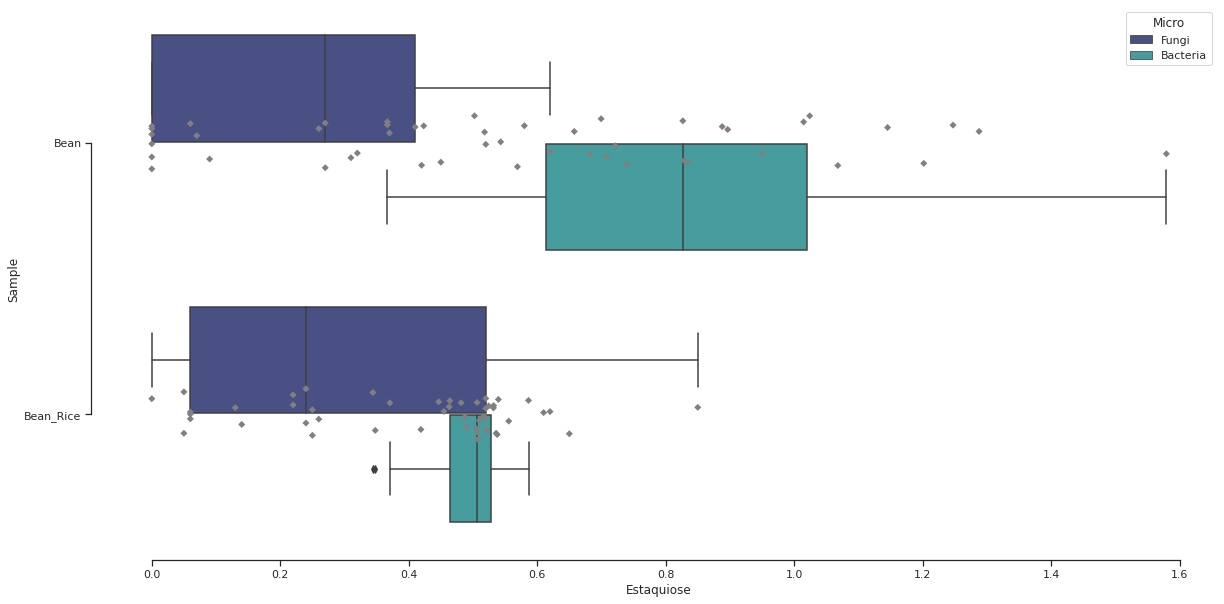

In [ ]:
sns.set_style("ticks")
ax= sns.stripplot(x= df.Estaquiose, y= df.Sample, 
                  data= df, color=".5", 
                  marker="D")
ax= sns.boxplot(x= df.Estaquiose, y= df.Sample, 
                   data= df, hue= df.Micro, 
                   palette='mako')
sns.despine(offset=10, trim=True)

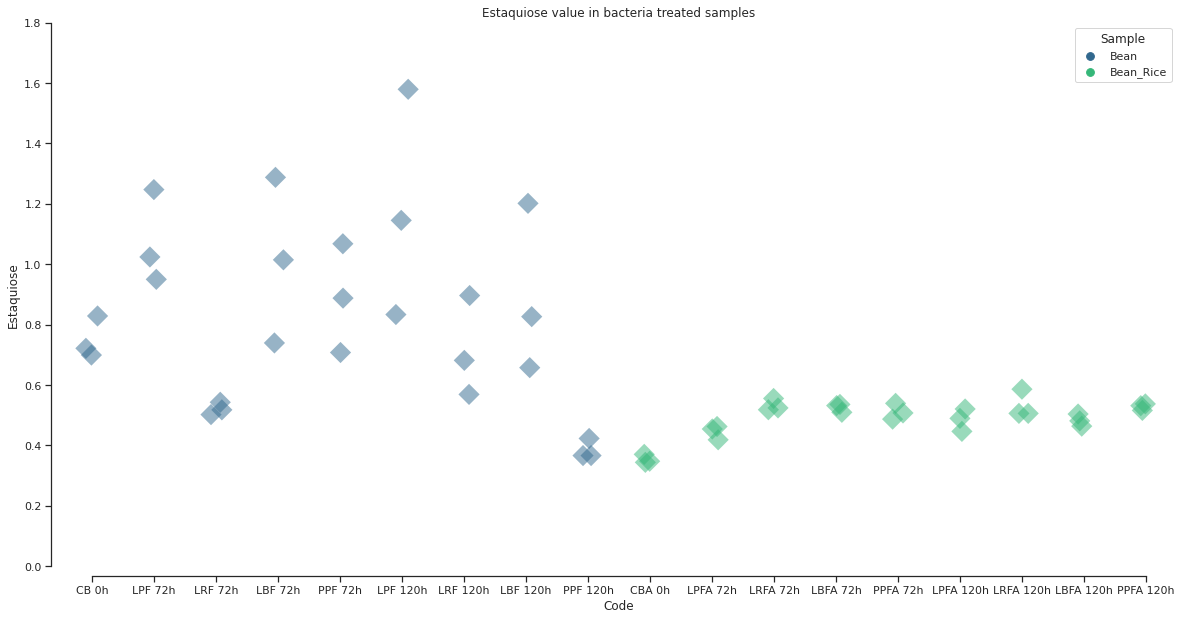

In [ ]:
plt.figure(figsize=(20,10))
sns.set_style("ticks")
g =  sns.stripplot(x="Code", y="Estaquiose", hue="Sample",
                   data=bacteria , palette="viridis", size=15, marker="D",
                   edgecolor="gray", alpha=.50)
g.set_ylim(0, 1.8)
plt.xticks(rotation=90)
g.figsize=(20, 10)
plt.title("Estaquiose value in bacteria treated samples")
sns.despine(offset=10, trim=True);

##Significance tests

In [ ]:
pg.anova(data=b_bean_rice ,dv= 'Estaquiose', between= 'Code', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,Code,0.082182,8,0.010273,15.140166,0.000002,0.870617
1,Within,0.012213,18,0.000679,NaN,NaN,NaN


In [ ]:
pc= sp.posthoc_tukey(b_bean_rice, val_col='Estaquiose', group_col='Code')
pc

,CBA 0h,LPFA 72h,LRFA 72h,LBFA 72h,PPFA 72h,LPFA 120h,LRFA 120h,LBFA 120h,PPFA 120h
CBA 0h,1.000000,0.010225,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000,0.001000
LPFA 72h,0.010225,1.000000,0.014852,0.028587,0.106732,0.610951,0.014587,0.674706,0.022362
LRFA 72h,0.001000,0.014852,1.000000,0.900000,0.900000,0.440941,0.900000,0.376033,0.900000
LBFA 72h,0.001000,0.028587,0.900000,1.000000,0.900000,0.614289,0.900000,0.550534,0.900000
PPFA 72h,0.001000,0.106732,0.900000,0.900000,1.000000,0.900000,0.900000,0.900000,0.900000
LPFA 120h,0.001000,0.610951,0.440941,0.614289,0.900000,1.000000,0.436154,0.900000,0.549368
LRFA 120h,0.001000,0.014587,0.900000,0.900000,0.900000,0.436154,1.000000,0.371450,0.900000
LBFA 120h,0.001000,0.674706,0.376033,0.550534,0.900000,0.900000,0.371450,1.000000,0.485526
PPFA 120h,0.001000,0.022362,0.900000,0.900000,0.900000,0.549368,0.900000,0.485526,1.000000


'plt.savefig("Heat.png")\nfiles.download("Heat.png")'

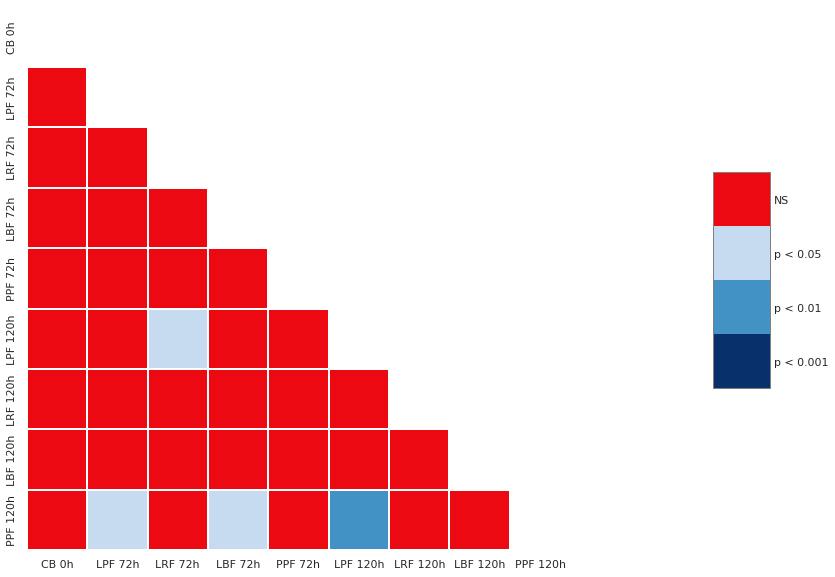

In [ ]:
pc= sp.posthoc_tukey(b_bean_rice, val_col='Estaquiose', group_col='Code')

#Format: diagonal, non-significant, p<0.001, p<0.01, p<0.05

cols = pc.columns
for i in range(len(cols)):
    for j in range(i, len(cols)):
        pc.iloc[i, j] = -1

sns.set(rc= {'figure.figsize':(20,10)})
cmap = ['1', '#ed0911',  '#08306b',  '#4292c6', '#c6dbef']
heatmap_args = {'cmap': cmap, 'linewidths': 0.25, 'linecolor': 'white', 
                'clip_on': False, 'square': True, 'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
sp.sign_plot(pc, **heatmap_args)
"""plt.savefig("Heat.png")
files.download("Heat.png")"""

group1,group2,meandiff,p-adj,lower,upper,reject
CBA,LBAF 120h,1.3933,0.0062,0.315,2.4717,True
CBA,LBAF 72h,-0.8333,0.2122,-1.9117,0.245,False
CBA,LPAF 120h,0.3467,0.962,-0.7317,1.425,False
CBA,LPAF 72h,0.0733,1.0,-1.005,1.1517,False
CBA,LRAF 120h,0.5467,0.6958,-0.5317,1.625,False
CBA,LRAF 72h,0.6333,0.5271,-0.445,1.7117,False
CBA,PPAF 120h,0.8533,0.1906,-0.225,1.9317,False
CBA,PPAF 72h,-0.2733,0.9909,-1.3517,0.805,False
LBAF 120h,LBAF 72h,-2.2267,0.0,-3.305,-1.1483,True
LBAF 120h,LPAF 120h,-1.0467,0.0611,-2.125,0.0317,False


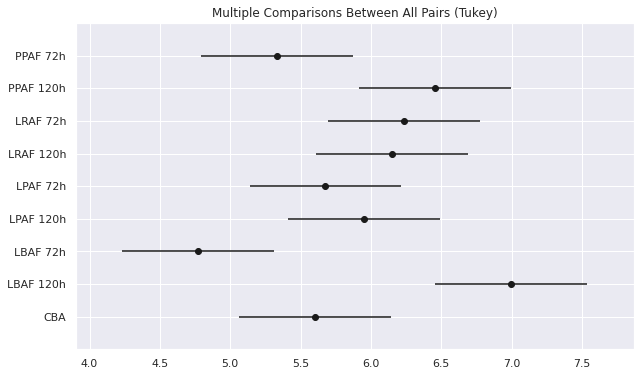

In [ ]:
tukey = pairwise_tukeyhsd(endog= b_bean_rice.Estaquiose,     # Data
                          groups= b_bean_rice.Code,   # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.hlines(xmin=97.6, xmax=99.5 ,y=-0.5, color="red", linestyles='dashed', label= 'NS')
plt.vlines(x=99.3,ymin=-0.5,ymax=4.5, color="magenta")

t =tukey.summary()              # See test summary
t

## Drafting

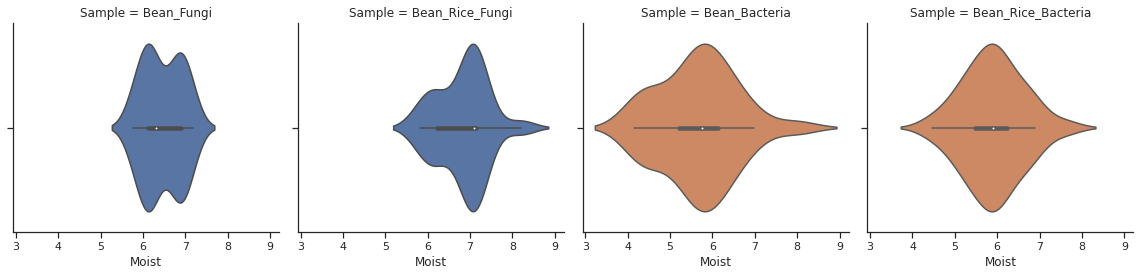

In [ ]:
g= sns.FacetGrid(df, col= 'Sample', hue= 'Micro', height= 4)
g.map(sns.violinplot, 'Moist', order=[1, 2])


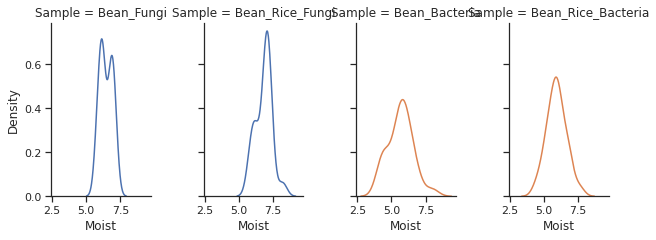

In [ ]:
g = sns.FacetGrid(df, col="Sample", hue= 'Micro', height=3.5, aspect=.65)
g.map(sns.kdeplot, "Moist")

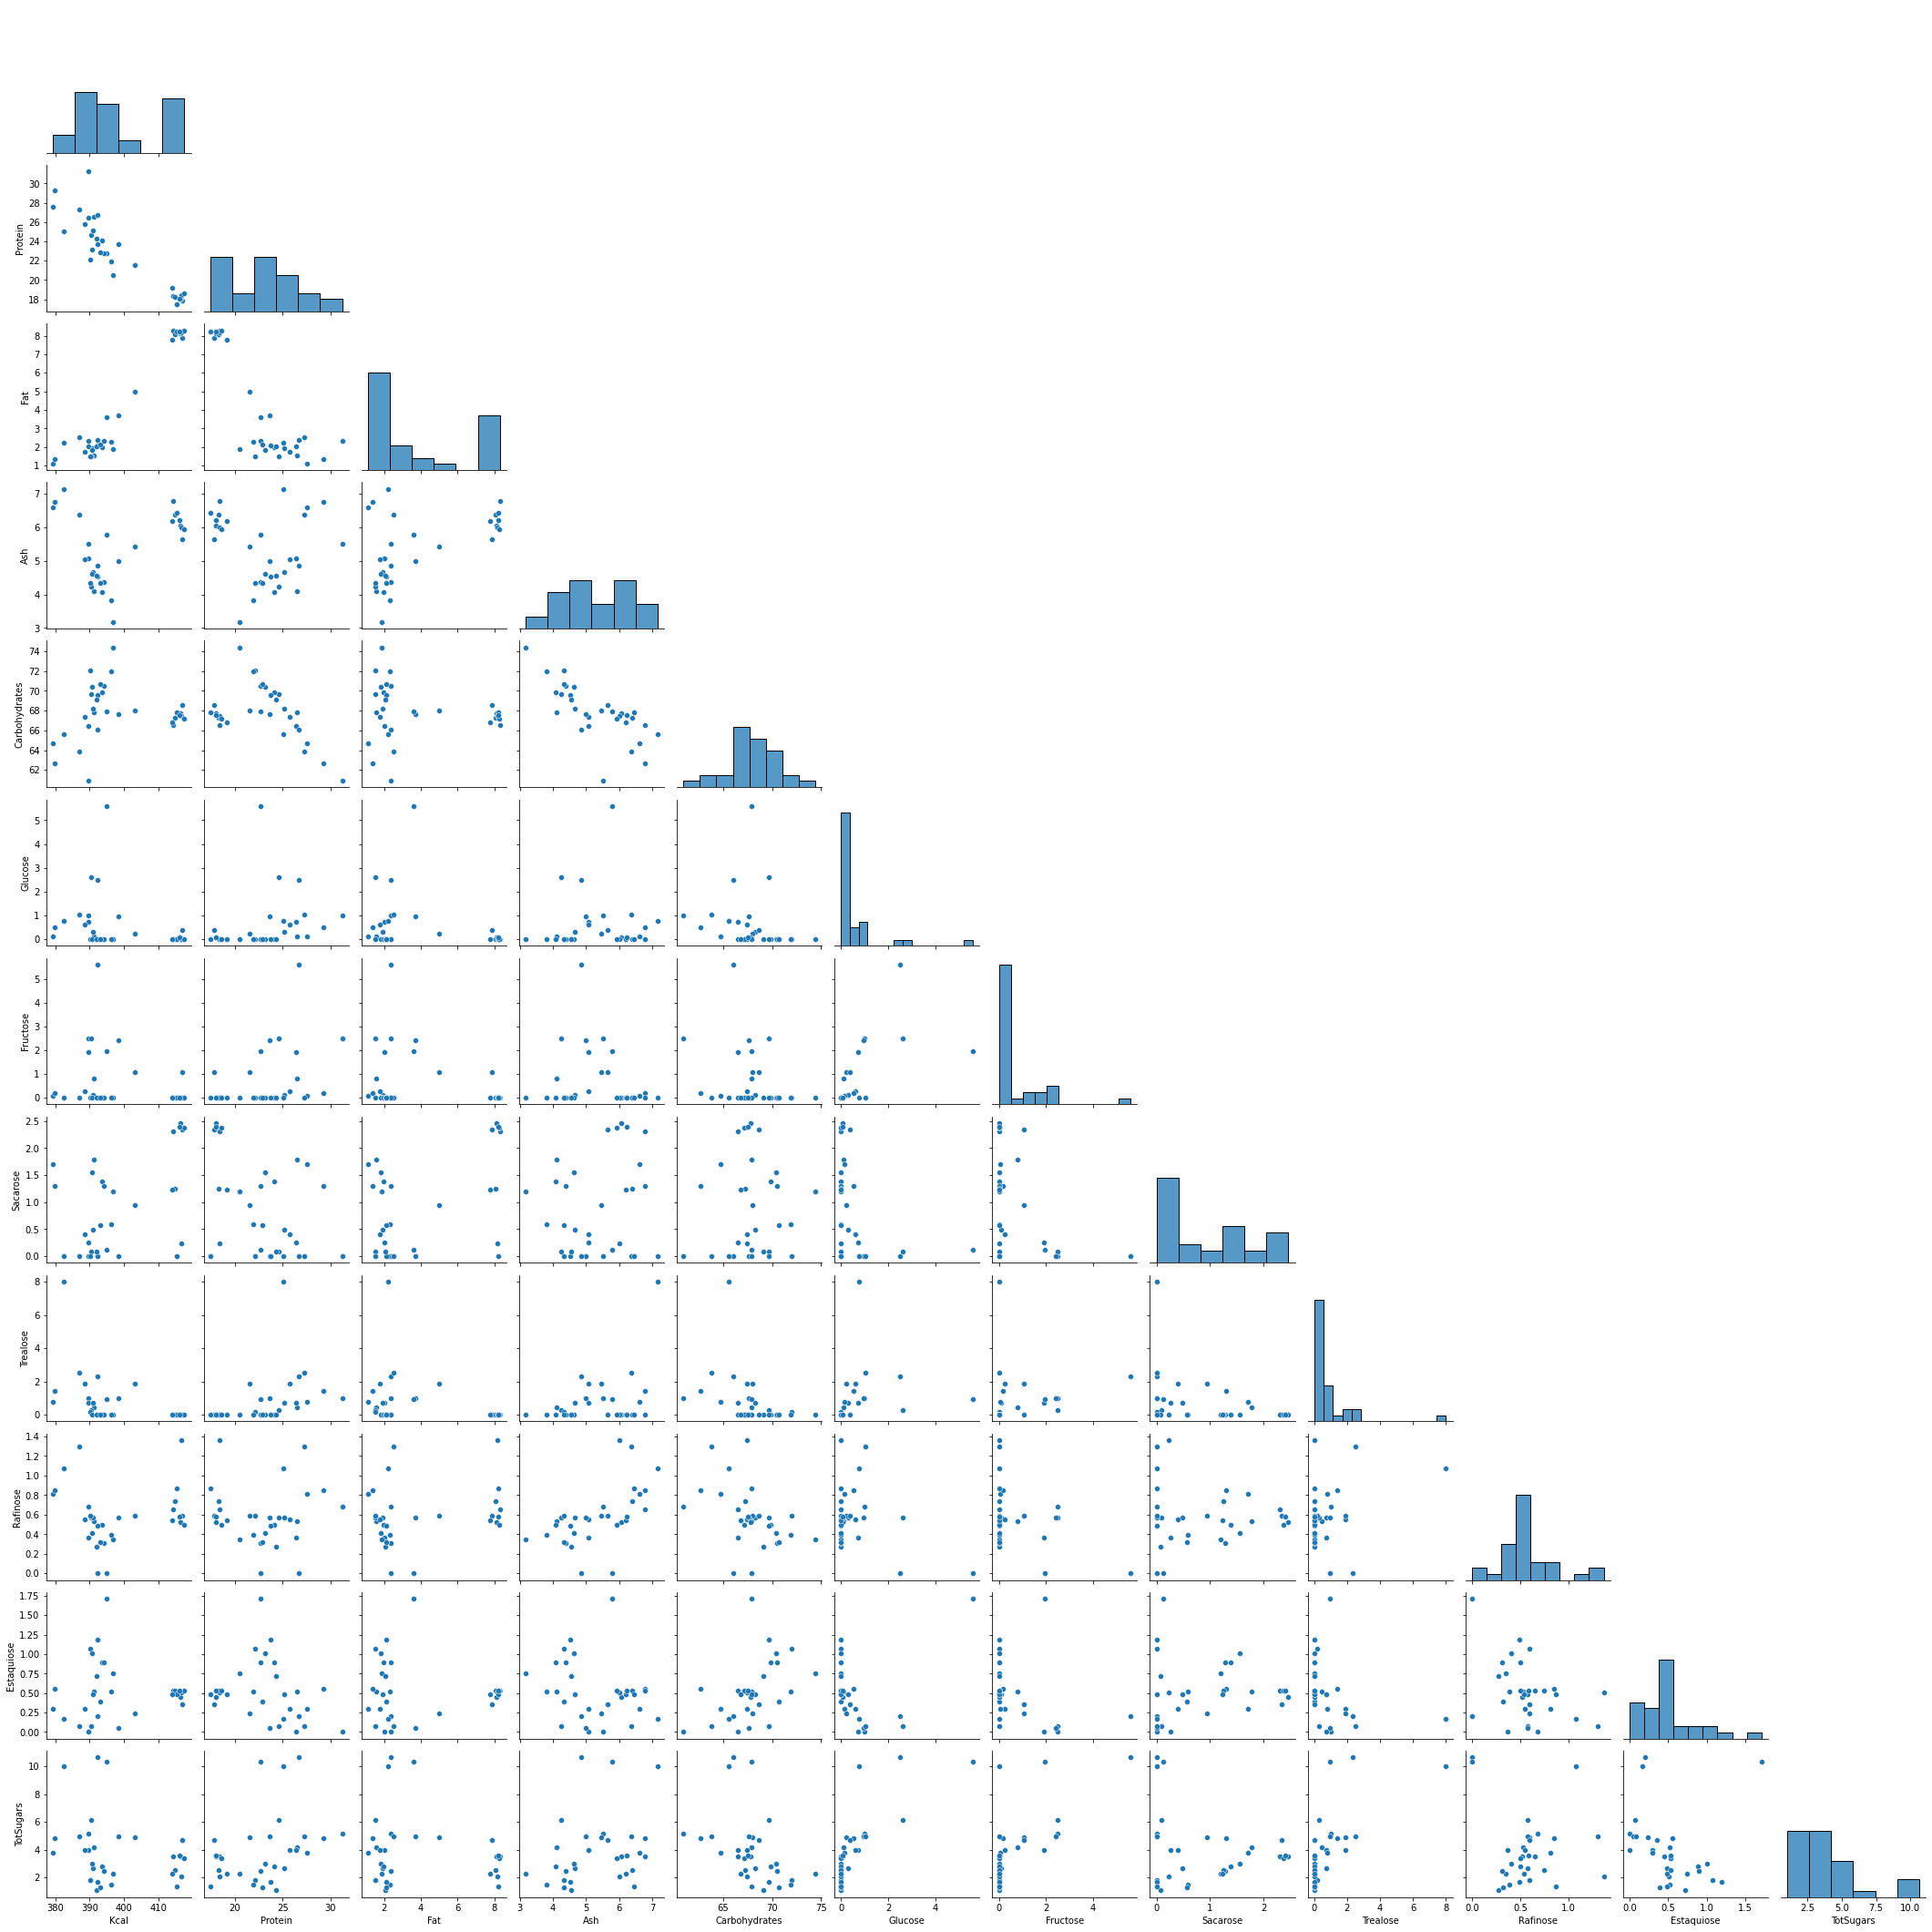

In [ ]:
##################
### pairplot
##################
sns.pairplot(df, corner=True)

